In [7]:
using LinearAlgebra
using ForwardDiff
using Plots
using MeshCat

In [8]:
f(x,u) = [u[1]*cos(x[3]); u[1]*sin(x[3]); u[2]]

f (generic function with 1 method)

In [96]:
function simulate(start=0, stop=10, dt=0.01; trajectory=nothing)
	times = Vector(start:dt:stop)
	states = zeros(3, length(times))
	states[:, begin] = [0, 0, 1]
	for t = 1:length(times)-1
		u = [1, 0]
		if trajectory != nothing 
			u = trajectory(times[t])
		end
		x_next = states[:, t] + f(states[:, t], u)*dt
		states[:, t+1] = x_next
	end

	states
end



simulate (generic function with 4 methods)

In [107]:
function traj(t)
	t < 2 && return [1, 0]
	(t>=2 && t < 4) && return [-1, 1]
	(t>=4 && t < 6) && return [1, 0]
	(t>=6 && t < 10) && return [1, 0.5]
end
	
states = simulate(trajectory=traj)

3×1001 Matrix{Float64}:
 0.0  0.00540302  0.010806   0.0162091  …  -2.41867  -2.41593  -2.41314
 0.0  0.00841471  0.0168294  0.0252441     -2.09119  -2.1008   -2.11041
 1.0  1.0         1.0        1.0            4.99      4.995     5.0

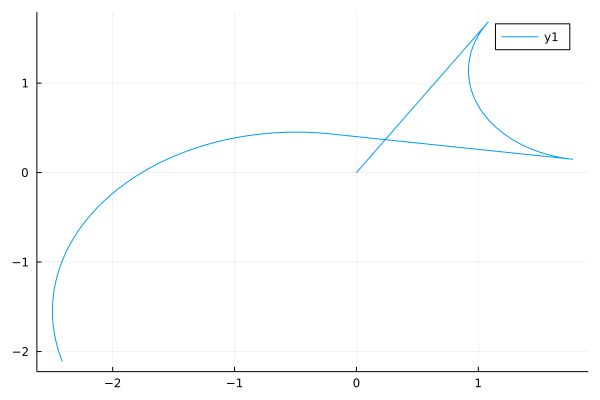

In [108]:
plot(states[1, :], states[2, :])